C:\Users\chkim\AppData\Local\Temp\ipykernel_38340\2488543907.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


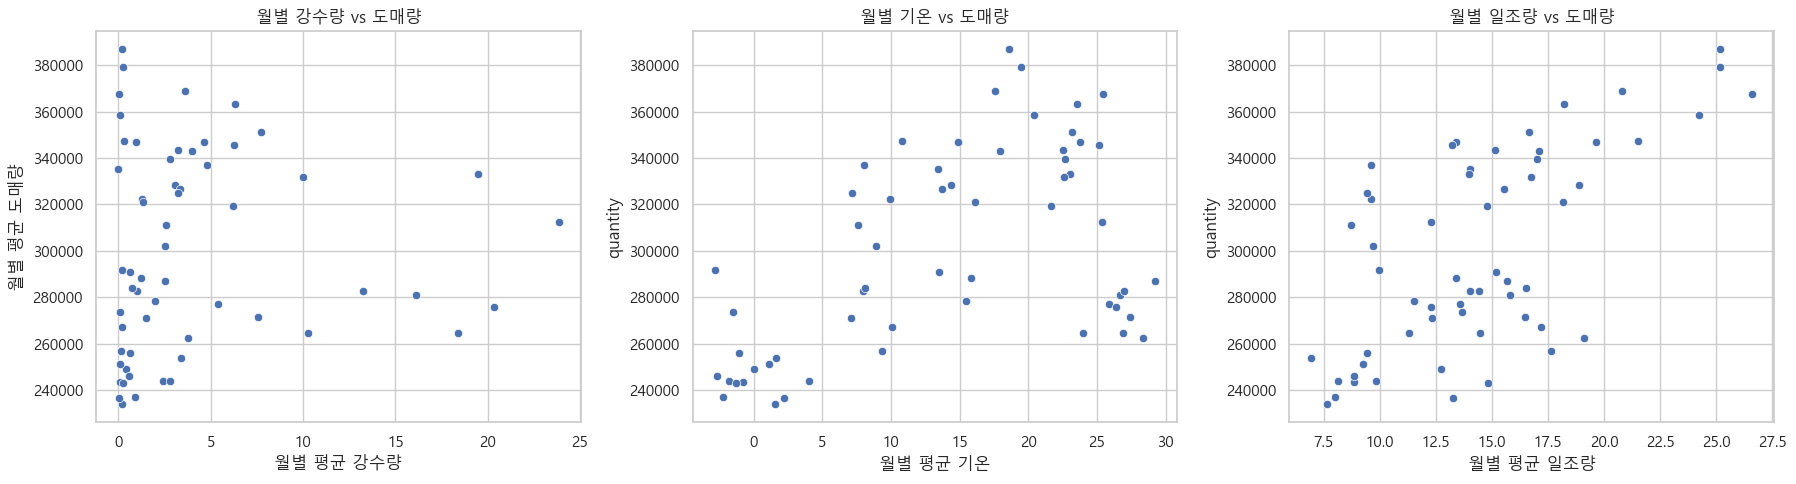

In [45]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import matplotlib

# ✅ 한글 폰트 설정
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# ✅ MySQL 연결
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='1234',
    db='project',
    charset='utf8'
)

# 데이터 불러오기
query = """
SELECT w.date, w.rainfall, w.avg_temp, w.sunlight, v.quantity
FROM weather w
JOIN volume v ON w.date = v.date
"""
df = pd.read_sql(query, conn)
conn.close()

# 날짜 -> 월 정보로 변환
df['date'] = pd.to_datetime(df['date'])
df['연월'] = df['date'].dt.to_period('M')

# 월별 평균 계산
monthly_df = df.groupby('연월').agg({
    'rainfall': 'mean',
    'avg_temp': 'mean',
    'sunlight': 'mean',
    'quantity': 'mean'
}).reset_index()

# 시각화
plt.figure(figsize=(18, 5))

# 1. 강수량 vs 도매량
plt.subplot(1, 3, 1)
sns.scatterplot(data=monthly_df, x='rainfall', y='quantity')
plt.title('월별 강수량 vs 도매량')
plt.xlabel('월별 평균 강수량')
plt.ylabel('월별 평균 도매량')

# 2. 기온 vs 도매량
plt.subplot(1, 3, 2)
sns.scatterplot(data=monthly_df, x='avg_temp', y='quantity')
plt.title('월별 기온 vs 도매량')
plt.xlabel('월별 평균 기온')

# 3. 일조량 vs 도매량
plt.subplot(1, 3, 3)
sns.scatterplot(data=monthly_df, x='sunlight', y='quantity')
plt.title('월별 일조량 vs 도매량')
plt.xlabel('월별 평균 일조량')

plt.tight_layout()
plt.show()
